In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

Text(0, 0.5, 'Number of Inches (Rain)')

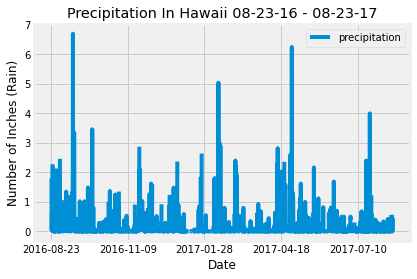

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
print(rain)
    

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain, columns = ["date", "precipitation"])

# Sort the dataframe by date
sort_date = rain_df.sort_values(by = "date", ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
sort_date.plot(x = "date", y = "precipitation" )
plt.title("Precipitation In Hawaii 08-23-16 - 08-23-17")
plt.xlabel("Date")
plt.ylabel("Number of Inches (Rain)")


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_df = sort_date.describe(include = "all")
summary_df

,date,precipitation
count,2230,2021.000000
unique,366,NaN
top,2016-09-19,NaN
freq,7,NaN
mean,NaN,0.177279
std,NaN,0.461190
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.020000
75%,NaN,0.130000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
print(total_stations)

[(9,)]


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Station.station)).group_by(Measurement.station).order_by(func.count(Station.station).desc()).all()


[('USC00519281', 24948),
 ('USC00519397', 24516),
 ('USC00513117', 24381),
 ('USC00519523', 24021),
 ('USC00516128', 23508),
 ('USC00514830', 19818),
 ('USC00511918', 17811),
 ('USC00517948', 12348),
 ('USC00518838', 4599)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
active

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

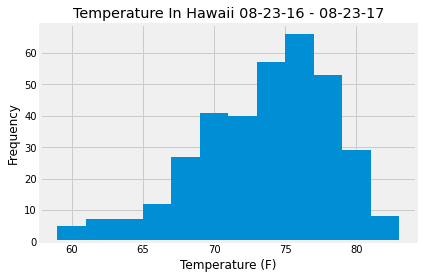

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= year_ago, Measurement.station == "USC00519281").all()
temp_df = pd.DataFrame(temp, columns = ["date", "temperature"])
sort_temp = temp_df.sort_values(by = "date", ascending = True)
sort_temp.hist(bins = 12)
plt.title("Temperature In Hawaii 08-23-16 - 08-23-17")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")

# Close session

In [16]:
# Close Session
session.close()